In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
df = pd.read_csv('C:/Users/Ram Yadav/Downloads/data/drug200.csv')

<h3>About the Dataset</h3>
<p>We have collected data about a set of patients, all of whom suffered from the same illness. During their course of treatment, each patient responded to one of 5 medications, Drug A, Drug B, Drug c, Drug x and y.</p>

In [4]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [5]:
df.shape

(200, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


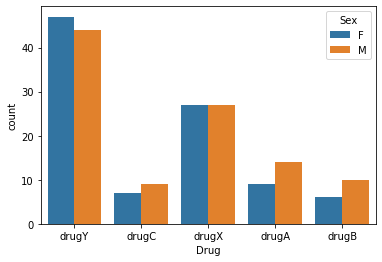

In [7]:
sns.countplot(x='Drug',hue='Sex',data=df)

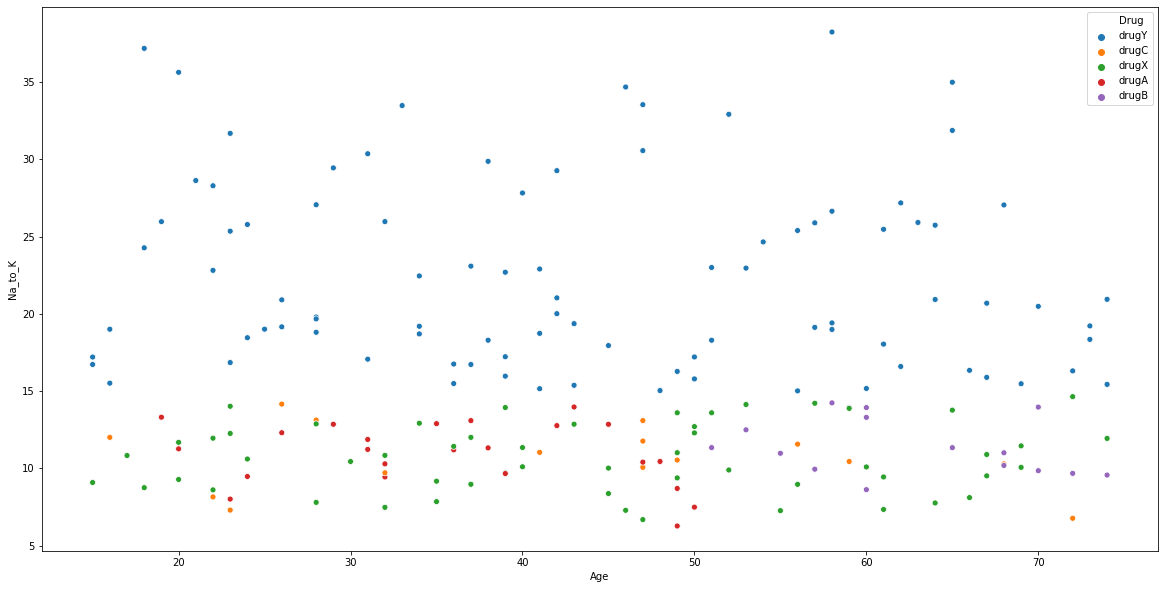

In [8]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='Age',y='Na_to_K',hue='Drug',data=df)

<h3>Data Processing </h3>

<h3>1. Sex</h3>
<p>Set male as 1 and female as 0</p>

In [9]:
df.Sex.value_counts()

M    104
F     96
Name: Sex, dtype: int64

In [10]:
df['Sex'] = df['Sex'].replace({'M':1,'F':0})

<h3>2. BP</h3>
<p>High:0, Low:1, Normal:2  </p>

In [11]:
df.BP.value_counts()

HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64

In [12]:
df['BP'] = df['BP'].replace({'HIGH':0,'LOW':1,'NORMAL':2})

<h3>2. Cholesterol</h3>
<p>High:0, Normal:1  </p>

In [13]:
df.Cholesterol.value_counts()

HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64

In [14]:
df['Cholesterol'] = df['Cholesterol'].replace({'HIGH':0,'NORMAL':1})

In [15]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,drugY
1,47,1,1,0,13.093,drugC
2,47,1,1,0,10.114,drugC
3,28,0,2,0,7.798,drugX
4,61,0,1,0,18.043,drugY


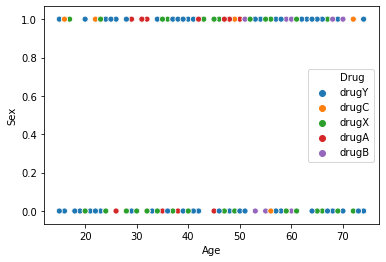

In [16]:
sns.scatterplot(x='Age',y='Sex',hue='Drug',data=df)

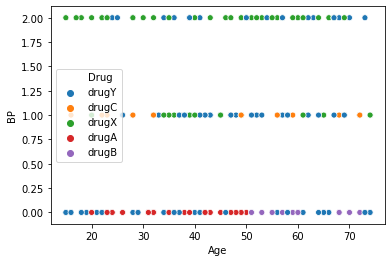

In [17]:
sns.scatterplot(x='Age',y='BP',hue='Drug',data=df)

<h3>Splitting dataset into Train and test dataset</h3>

In [18]:
X = df.drop('Drug',axis=1)
y=df['Drug']

In [19]:
X.head(2)

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,0,0,25.355
1,47,1,1,0,13.093


In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

<h3>Training the Model</h3>

In [21]:
lr = LogisticRegression()
svm = SVC()
rfc = RandomForestClassifier()
dt = DecisionTreeClassifier()
knn = KNeighborsClassifier()

In [22]:
lr.fit(X_train,y_train)
svm.fit(X_train,y_train)
rfc.fit(X_train,y_train)
dt.fit(X_train,y_train)
knn.fit(X_train,y_train)

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

<h3>Prediction</h3>

In [23]:
lr_predict = lr.predict(X_test)
svm_predict = svm.predict(X_test)
rfc_predict = rfc.predict(X_test)
dt_predict = dt.predict(X_test)
knn_predict = knn.predict(X_test)

<h3>Evaluation of the Model</h3>

In [24]:
from sklearn import metrics

In [25]:
print("Logistic Regression's Accuracy: ",metrics.accuracy_score(y_test,lr_predict))
print("SVC's Accuracy: ",metrics.accuracy_score(y_test,svm_predict))
print("Random forest classifier's Accuracy: ",metrics.accuracy_score(y_test,rfc_predict))
print("DecisionTree Classifier's Accuracy: ",metrics.accuracy_score(y_test,dt_predict))
print("K Nearest Neighbur's Accuracy: ",metrics.accuracy_score(y_test,knn_predict))

Logistic Regression's Accuracy:  0.7833333333333333
SVC's Accuracy:  0.7333333333333333
Random forest classifier's Accuracy:  1.0
DecisionTree Classifier's Accuracy:  1.0
K Nearest Neighbur's Accuracy:  0.6333333333333333
